# Problem Statement

* Analyse Customer Transactions data and Create Segments to understand the Customers better
* One of the most prominent ways of Clustering Customers is to use RFM data
* We have transactions in our data which need to be converted to RFM format

## Pre-process data for K means

* Log transform to make data Symmetric or Normal Distn
* Standardization using StandardScaler
* Fit K means

### Source of Data UCI
* Data from https://archive.ics.uci.edu/ml/datasets/online+retail#

In [11]:
import os
import pandas as pd
cwd = os.chdir("D://Springbrd//Daily Progress//MyGit")

df_all = pd.read_excel("Online Retail.xlsx")

In [71]:
df_org = df_all

In [12]:
df_all.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
print(df_all.describe().round(1))
print(df_all.shape)

       Quantity  UnitPrice  CustomerID
count  541909.0   541909.0    406829.0
mean        9.6        4.6     15287.7
std       218.1       96.8      1713.6
min    -80995.0   -11062.1     12346.0
25%         1.0        1.2     13953.0
50%         3.0        2.1     15152.0
75%        10.0        4.1     16791.0
max     80995.0    38970.0     18287.0
(541909, 8)


## Remove NaNs

In [14]:
df_all = df_all.dropna(axis=0)
df_all.shape

(406829, 8)

In [15]:
# Count all NaNs to verify if they have been removed
pd.isnull(df_all).sum() # To check by Columns
pd.isnull(df_all).sum().sum() # To check columns and Rows

0

### Return Transactions

* The dataset has transactions which were reversed, hence we have Qty < 0
* We have both +ve/-ve transactions with same Qty, which is the returns
* We keep the +ve transactions - Assuming the returns were mainly due to reasons related to product misfit etc

In [16]:
# Removing Qty < 0 records
df_pos = df_all[df_all.Quantity > 0]

In [17]:
print(df_pos.shape)
print(df_pos.describe().round(1))

(397924, 8)
       Quantity  UnitPrice  CustomerID
count  397924.0   397924.0    397924.0
mean       13.0        3.1     15294.3
std       180.4       22.1      1713.2
min         1.0        0.0     12346.0
25%         2.0        1.2     13969.0
50%         6.0        2.0     15159.0
75%        12.0        3.8     16795.0
max     80995.0     8142.8     18287.0


## Do we filter out data for specific Countries for analysis?
* This is more of a Business Question - depends if the business wants to run specific Mktg promotions in certain countries
* We have data for 37 different countries
* Since we are focusing on RFM analysis irrespective of Country and Product, we will analyse the complete dataset

In [21]:
print(df_pos.Country.unique())
print(len(df_pos.Country.unique()))

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
37


### We see UnitPrice = 0, these might be transactions which were promotional or might be invalid/duplicate data

In [18]:
# Let us look at Transactions with Price = 0
df_pos[df_pos.UnitPrice == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


### Further checks on Price = 0

* Let's choose Customer ID '282912' and look closely at all transactions made by this cutomer
* Look for the 'InvoiceDate' = 2011-07-28 17:09:00 where we can see that, Price is 0 as the transaction is a duplicated transaction. Hence we delete these entries..

In [30]:
df_pos[df_pos.CustomerID == 12507].sort_values(by=['InvoiceDate'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
88900,543822,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-02-14 09:24:00,4.95,12507.0,Spain
88912,543822,POST,POSTAGE,3,2011-02-14 09:24:00,28.00,12507.0,Spain
88911,543822,22893,MINI CAKE STAND T-LIGHT HOLDER,48,2011-02-14 09:24:00,0.42,12507.0,Spain
88909,543822,22956,36 FOIL HEART CAKE CASES,12,2011-02-14 09:24:00,2.10,12507.0,Spain
88908,543822,22955,36 FOIL STAR CAKE CASES,12,2011-02-14 09:24:00,2.10,12507.0,Spain
88907,543822,84375,SET OF 20 KIDS COOKIE CUTTERS,12,2011-02-14 09:24:00,2.10,12507.0,Spain
88910,543822,22937,BAKING MOULD CHOCOLATE CUPCAKES,18,2011-02-14 09:24:00,2.55,12507.0,Spain
88905,543822,84378,SET OF 3 HEART COOKIE CUTTERS,12,2011-02-14 09:24:00,1.25,12507.0,Spain
88904,543822,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,12,2011-02-14 09:24:00,1.25,12507.0,Spain
88903,543822,22960,JAM MAKING SET WITH JARS,24,2011-02-14 09:24:00,3.75,12507.0,Spain


* We delete the entries with Price = 0 as we conclude that these are duplicates or promotional offers

In [31]:
# Excluding Transactions with Price = 0
df_pos = df_pos[df_pos.UnitPrice >0 ]
df_pos.shape

(397884, 8)

In [32]:
df_pos.describe().round(1)

,Quantity,UnitPrice,CustomerID
count,397884.0,397884.0,397884.0
mean,13.0,3.0,15294.0
std,179.0,22.0,1713.0
min,1.0,0.0,12346.0
25%,2.0,1.0,13969.0
50%,6.0,2.0,15159.0
75%,12.0,4.0,16795.0
max,80995.0,8143.0,18287.0


### Outliers

* From the above summary statistics we see that, Quantity & Price might have some outliers
* However, we are still at a stage where we should Group the data by CustomerIDs first and then detect Outliers
* Perform Groupby on CustomerID and InvoiceDate
* Investigate using Histogram plots to check if we should keep or remove the outliers

In [36]:
df_pos.sort_values(by=['CustomerID','InvoiceDate']).head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14943,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14944,537626,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14945,537626,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland
14946,537626,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland


In [38]:
# We want Revenue by Customer so in transaction we create new Column Revenue

df_pos['Rev'] = df_pos.Quantity * df_pos.UnitPrice

In [42]:
df_pos.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [44]:
df_pos_bckup1 = df_pos

In [55]:
df_pos_bckup1.shape

(397884, 11)

### Group data and retain only relevant Variables

* RFM Definition - (R) days since last buy, (F) total of transactions, (M) average order value
* We have calculated Revenue, we need to extract Avg Order Value
* We also need Recency and Frequency
* Get Recency from most Recent InvoiceDate and Frequency from # Transactions


In [47]:
# At this stage we drop Vaariables which are not required
# Drop Qty, Price and Product Description columns
df = df_pos.drop(['InvoiceNo','Quantity','UnitPrice','Description','StockCode'], axis = 1)

In [57]:
df.shape

(397884, 5)

In [56]:
df.columns

Index(['InvoiceDate', 'CustomerID', 'Country', 'Rev', 'InvoiceDay'], dtype='object')

In [58]:
df.head()

,InvoiceDate,CustomerID,Country,Rev,InvoiceDay
0,2010-12-01 08:26:00,17850.0,United Kingdom,15.30,2010-12-01
1,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,2010-12-01
2,2010-12-01 08:26:00,17850.0,United Kingdom,22.00,2010-12-01
3,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,2010-12-01
4,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,2010-12-01


In [67]:
len(df.CustomerID.unique())

4338

In [69]:
# Check if each Customer is linked to transactions from single Country
print(df.groupby('CustomerID')['Country'].unique())
print(len(df.groupby('CustomerID')['Country'].unique()))
# We conclude that each customer is linked to a Single Country

CustomerID
12346.0     [United Kingdom]
12347.0            [Iceland]
12348.0            [Finland]
12349.0              [Italy]
12350.0             [Norway]
12352.0             [Norway]
12353.0            [Bahrain]
12354.0              [Spain]
12355.0            [Bahrain]
12356.0           [Portugal]
12357.0        [Switzerland]
12358.0            [Austria]
12359.0             [Cyprus]
12360.0            [Austria]
12361.0            [Belgium]
12362.0            [Belgium]
12363.0        [Unspecified]
12364.0            [Belgium]
12365.0             [Cyprus]
12367.0            [Denmark]
12370.0    [Cyprus, Austria]
12371.0        [Switzerland]
12372.0            [Denmark]
12373.0            [Austria]
12374.0            [Austria]
12375.0            [Finland]
12377.0        [Switzerland]
12378.0        [Switzerland]
12379.0            [Belgium]
12380.0            [Belgium]
                 ...        
18242.0     [United Kingdom]
18245.0     [United Kingdom]
18246.0     [United Kingdom]
182

In [73]:
# We delete the Country & InvoiceDate Column as we focus only on RFM
df = df.drop(['Country'],['InvoiceDate'], axis = 1)

In [80]:
df.head()

,CustomerID,Rev,InvoiceDay
0,17850.0,15.30,2010-12-01
1,17850.0,20.34,2010-12-01
2,17850.0,22.00,2010-12-01
3,17850.0,20.34,2010-12-01
4,17850.0,20.34,2010-12-01


In [82]:
today = pd.datetime.now()
print(today)

2018-12-29 12:09:02.690693


2018-12-29


In [89]:
df['today'] = today_dt

In [90]:
df.head()

,CustomerID,Rev,InvoiceDay,today
0,17850.0,15.30,2010-12-01,2018-12-29
1,17850.0,20.34,2010-12-01,2018-12-29
2,17850.0,22.00,2010-12-01,2018-12-29
3,17850.0,20.34,2010-12-01,2018-12-29
4,17850.0,20.34,2010-12-01,2018-12-29


### Mertrics Calculations
* Calculate Frequency = # Transactions
* Calculate Recency = Today - max(InvoiceDay)
* Monetary = Avg.Rev by CustomerID

In [92]:
# Groupby Customer get Mean Rev 
df1 = df.groupby('CustomerID')['Rev'].mean().to_frame().reset_index()
df1.shape
df1.head()

,CustomerID,Rev
0,12346.0,77183.600000
1,12347.0,23.681319
2,12348.0,57.975484
3,12349.0,24.076027
4,12350.0,19.670588


In [331]:
df.head()
df.describe()

,Quantity,UnitPrice,CustomerID
count,15989.000000,15989.000000,15989.00000
mean,12.482269,3.145442,15329.21027
std,39.849581,5.412747,1740.21424
min,1.000000,0.000000,12347.00000
25%,2.000000,1.250000,13971.00000
50%,6.000000,1.950000,15303.00000
75%,12.000000,3.750000,16923.00000
max,2000.000000,295.000000,18283.00000


In [96]:
# Get most Recent InvoiceDay by CustomerID
df2 = df.groupby('CustomerID')['InvoiceDay'].max().to_frame().reset_index()

df2.head()


,CustomerID,InvoiceDay
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [98]:
# Get Total # Transactions by CustomerID
df3 = df.groupby('CustomerID')['InvoiceDay'].count().to_frame().reset_index()
df3.head()

,CustomerID,InvoiceDay
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [99]:
# Rename Consolidated Metrics as Rquired
df1 = df1.rename(columns = {"CustomerID": "CustomerID", 
                                  "Rev": "AvgRev"})
df3 = df3.rename(columns = {"CustomerID": "CustomerID", 
                                  "InvoiceDay": "PurchsFreq"})

In [100]:
df3.head()

,CustomerID,PurchsFreq
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [101]:
## We did Groupby twice for Date and Rev
## We will merge on CustomerID

datamart_rfm = df1.merge(df2, how='inner')
datamart_rfm.head()

,CustomerID,AvgRev,InvoiceDay
0,12346.0,77183.600000,2011-01-18
1,12347.0,23.681319,2011-12-07
2,12348.0,57.975484,2011-09-25
3,12349.0,24.076027,2011-11-21
4,12350.0,19.670588,2011-02-02


In [102]:
## We Merge again to Get Purchase Feq column

datamart_rfm = datamart_rfm.merge(df3, how='inner')
datamart_rfm.head()

,CustomerID,AvgRev,InvoiceDay,PurchsFreq
0,12346.0,77183.600000,2011-01-18,1
1,12347.0,23.681319,2011-12-07,182
2,12348.0,57.975484,2011-09-25,31
3,12349.0,24.076027,2011-11-21,73
4,12350.0,19.670588,2011-02-02,17


In [129]:
datamart_rfm.head()

,CustomerID,AvgRev,InvoiceDay,PurchsFreq,Today
0,12346.0,77183.600000,2011-01-18,1,2018-12-29
1,12347.0,23.681319,2011-12-07,182,2018-12-29
2,12348.0,57.975484,2011-09-25,31,2018-12-29
3,12349.0,24.076027,2011-11-21,73,2018-12-29
4,12350.0,19.670588,2011-02-02,17,2018-12-29


In [127]:
datamart_rfm.dtypes

CustomerID           float64
AvgRev               float64
InvoiceDay    datetime64[ns]
PurchsFreq             int64
Today         datetime64[ns]
dtype: object

In [115]:
today = pd.datetime.now()
print(today)
print(type(today))

2018-12-29 12:53:20.217283


In [ ]:
datamart_rfm['Today'] = today

In [128]:
datamart_rfm['Today'] = datamart_rfm.Today.dt.date
datamart_rfm['InvoiceDay'] = datamart_rfm.InvoiceDay.dt.date

In [130]:
datamart_rfm['Recency'] = datamart_rfm.Today - datamart_rfm.InvoiceDay

In [166]:
datamart_rfm.dtypes

CustomerID            float64
AvgRev                float64
InvoiceDay             object
PurchsFreq              int64
Today                  object
Recency       timedelta64[ns]
dtype: object

In [132]:
datamart_rfm.head()

,CustomerID,AvgRev,InvoiceDay,PurchsFreq,Today,Recency
0,12346.0,77183.600000,2011-01-18,1,2018-12-29,2902 days
1,12347.0,23.681319,2011-12-07,182,2018-12-29,2579 days
2,12348.0,57.975484,2011-09-25,31,2018-12-29,2652 days
3,12349.0,24.076027,2011-11-21,73,2018-12-29,2595 days
4,12350.0,19.670588,2011-02-02,17,2018-12-29,2887 days


In [167]:
df_final = datamart_rfm.drop(['Today', 'InvoiceDay'] , axis = 1)

In [168]:
df_final.head()

,CustomerID,AvgRev,PurchsFreq,Recency
0,12346.0,77183.600000,1,2902 days
1,12347.0,23.681319,182,2579 days
2,12348.0,57.975484,31,2652 days
3,12349.0,24.076027,73,2595 days
4,12350.0,19.670588,17,2887 days


In [169]:
# Reordering Columns to RFM

df_final = df_final[['CustomerID','Recency', 'PurchsFreq', 'AvgRev']]

In [356]:
# Check data types as we had date time format
datamart_rfm.dtypes

CustomerID            float64
Recency       timedelta64[ns]
PurchsFreq              int64
Rev                   float64
dtype: object

In [170]:
df_final.head()

,CustomerID,Recency,PurchsFreq,AvgRev
0,12346.0,2902 days,1,77183.600000
1,12347.0,2579 days,182,23.681319
2,12348.0,2652 days,31,57.975484
3,12349.0,2595 days,73,24.076027
4,12350.0,2887 days,17,19.670588


In [171]:
# Convert Recency to int

from datetime import datetime, timedelta

df_final.Recency = df_final.Recency/ timedelta(days=1)

In [172]:
print(df_final.head())
print(df_final.shape)

   CustomerID  Recency  PurchsFreq        AvgRev
0     12346.0   2902.0           1  77183.600000
1     12347.0   2579.0         182     23.681319
2     12348.0   2652.0          31     57.975484
3     12349.0   2595.0          73     24.076027
4     12350.0   2887.0          17     19.670588
(4338, 4)


### Outliers

* Now that we have converted data to the required format, we check for Outliers
* Simplest checks is to look at the Summary stats of Variables first

In [173]:
df_final.describe()

,CustomerID,Recency,PurchsFreq,AvgRev
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,2669.059474,91.720609,68.350506
std,1721.808492,100.012264,228.785094,1467.918896
min,12346.000000,2577.000000,1.000000,2.101286
25%,13813.250000,2594.000000,17.000000,12.365367
50%,15299.500000,2627.000000,41.000000,17.723119
75%,16778.750000,2718.750000,100.000000,24.858417
max,18287.000000,2950.000000,7847.000000,77183.600000


### Observation regd. Outliers

* We see that for AvgRev and PurchsFreq Max. and Std dev. are very high

#### AvgRev
* Max. Avg Rev is for CustomerID = 12346 which is clearly an outlier
* There are no other outliers apart from this, can be verified by sorting AvgRev in descending order

#### Purchase Freq

* We see that 25% has Freq >= 100 but only 1.86% has Freq >= 500
* We will investigate further and then decide if we should exclude this

In [156]:
# Remove the only record which has very high AvgRev

#df_final = df_final[df_final.CustomerID != 12346 ]
print(df_final.shape)
# Check the record for which PurchsFreq is highest

print(df_final[df_final.PurchsFreq == 7847])

# The record looks genuine so we check for # Values higher than 1000

print(len(df_final[df_final.PurchsFreq >= 500]))


(4338, 8)
      CustomerID  Recency  PurchsFreq    AvgRev   0   1   2   3
4009     17841.0   2578.0      7847.0  5.223852 NaN NaN NaN NaN
81


In [174]:
df_final.sort_values(by=['AvgRev'], ascending = False).head(15)

,CustomerID,Recency,PurchsFreq,AvgRev
0,12346.0,2902.0,1,77183.600000
3008,16446.0,2577.0,3,56157.500000
2011,15098.0,2759.0,3,13305.500000
2502,15749.0,2812.0,10,4453.430000
2087,15195.0,2579.0,1,3861.000000
597,13135.0,2773.0,1,3096.000000
4013,17846.0,2662.0,1,2033.100000
4191,18087.0,2675.0,2,2027.860000
3071,16532.0,2594.0,4,1687.200000
2678,16000.0,2579.0,9,1377.077778


In [ ]:
## We have removed only some outliers here, we can look for more if we want

K means is sensitive to Oultiers.. 

In [175]:
df_final.sort_values(by=['PurchsFreq'], ascending = False).head(15)

,CustomerID,Recency,PurchsFreq,AvgRev
4010,17841.0,2578.0,7847,5.223852
1879,14911.0,2578.0,5675,25.343623
1289,14096.0,2581.0,5111,12.749910
326,12748.0,2577.0,4595,7.338353
1661,14606.0,2578.0,2700,4.502463
2176,15311.0,2577.0,2379,25.543464
1689,14646.0,2578.0,2076,134.973998
562,13089.0,2579.0,1818,32.357442
690,13263.0,2578.0,1677,4.444884
1434,14298.0,2585.0,1637,31.476665


In [176]:
df_final.describe()

,CustomerID,Recency,PurchsFreq,AvgRev
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,2669.059474,91.720609,68.350506
std,1721.808492,100.012264,228.785094,1467.918896
min,12346.000000,2577.000000,1.000000,2.101286
25%,13813.250000,2594.000000,17.000000,12.365367
50%,15299.500000,2627.000000,41.000000,17.723119
75%,16778.750000,2718.750000,100.000000,24.858417
max,18287.000000,2950.000000,7847.000000,77183.600000


### To check Normal Distribution of Variables

* Plot Histograms for each
* We observe that all the curves are non-symmetric
* we will apply log transformation to make the variables symmetric

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

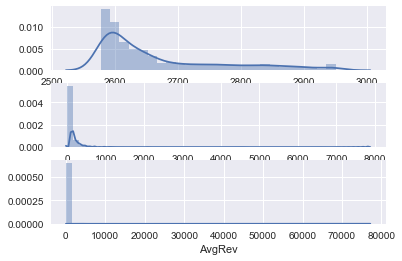

In [141]:
# Plot Histograms for RFM Vars

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(df_final['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(df_final['PurchsFreq'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(df_final['AvgRev'])

# Show the plot
plt.show()

In [143]:
# Conduct Normality Test as well.

import scipy.stats as stats
from scipy.stats import norm

nt = stats.mstats.normaltest(df_final['Recency'])

print('The z-statstic of the normality test is {:1.3f} with a p-value of {:1.3f}.'.format(nt[0],nt[1]))

The z-statstic of the normality test is 731.196 with a p-value of 0.000.


* We need to make the data normal and have same means and std
* We will standardise the data (mean = 0, std = 1) using StandardScaler

In [177]:
df_bckup1 = df_final

In [178]:
df_rfm = df_final.iloc[:,1:4]
df_rfm.head()

,Recency,PurchsFreq,AvgRev
0,2902.0,1,77183.600000
1,2579.0,182,23.681319
2,2652.0,31,57.975484
3,2595.0,73,24.076027
4,2887.0,17,19.670588


In [179]:
# Checking for NaNs if any
pd.isnull(df_rfm).sum()

Recency       0
PurchsFreq    0
AvgRev        0
dtype: int64

In [180]:
df_rfm.describe().round(1)

,Recency,PurchsFreq,AvgRev
count,4338.0,4338.0,4338.0
mean,2669.1,91.7,68.4
std,100.0,228.8,1467.9
min,2577.0,1.0,2.1
25%,2594.0,17.0,12.4
50%,2627.0,41.0,17.7
75%,2718.8,100.0,24.9
max,2950.0,7847.0,77183.6


In [183]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Unskew the data
datamart_log = np.log(df_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
df_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
df_normalized = pd.DataFrame(data=df_normalized, index=df_rfm.index, columns=df_rfm.columns)

In [185]:
# Checking Mean/Std. after Normalization
df_normalized.describe().round(1)

,Recency,PurchsFreq,AvgRev
count,4338.0,4338.0,4338.0
mean,-0.0,0.0,-0.0
std,1.0,1.0,1.0
min,-0.9,-2.8,-2.4
25%,-0.8,-0.6,-0.4
50%,-0.4,0.0,-0.0
75%,0.5,0.7,0.3
max,2.7,4.0,9.2


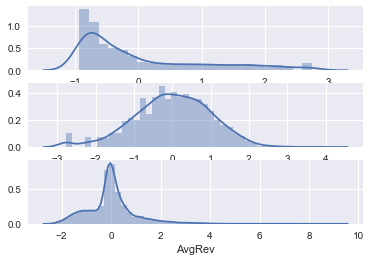

In [187]:
# Plot Histograms for RFM Vars

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(df_normalized['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(df_normalized['PurchsFreq'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(df_normalized['AvgRev'])

# Show the plot
plt.show()

###### We see that the histograms are more symmetric now

In [188]:
# Import KMeans 
from sklearn.cluster import KMeans

x_cols = df_normalized
ss=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x_cols)
    ss.append(kmeans.inertia_)

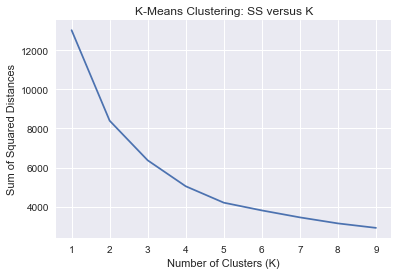

In [189]:
# Plotting the Elbow curve

plt.plot(range(1,10),ss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('K-Means Clustering: SS versus K')
plt.show()

## Selecting K

* We choose the K value where we see a elbow/inflection point
* We also need to consider with Business and share the statistical K value we have chosen

## K means with 3 clusters

In [193]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(df_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

### Clustering our RFM data

* We have used Normalized data to run K means
* Now we add the Cluster labels to our RFM data

In [195]:
# Create a DataFrame by adding a new cluster label column

df_rfm_k3 = df_final.assign(Cluster=cluster_labels)
df_rfm_k3.head()

,CustomerID,Recency,PurchsFreq,AvgRev,Cluster
0,12346.0,2902.0,1,77183.600000,2
1,12347.0,2579.0,182,23.681319,1
2,12348.0,2652.0,31,57.975484,2
3,12349.0,2595.0,73,24.076027,1
4,12350.0,2887.0,17,19.670588,0


In [196]:
df_rfm_k3.shape

(4338, 5)

In [197]:
# Exporting the Clusters/final output to csv file

df_rfm_k3.to_csv("Customer_Segments_RFM.csv")

In [ ]:
# Converting df_rfm_k3 to x and CustomerID to 'String' datatype
x = df_rfm_k3
x.CustomerID = x.CustomerID.astype(str)

In [240]:
# Group the data by cluster
grouped = x.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'PurchsFreq': 'mean',
    'AvgRev': ['mean', 'count']
  }).round(1)

Recency PurchsFreq AvgRev      
           mean       mean   mean count
Cluster                                
0        2832.0       24.7   26.4   965
1        2614.5      162.1   15.5  2124
2        2636.0       23.9  190.7  1249

In [241]:
grouped.head(5).sort_values(by=['Cluster'])

,CustomerID,Recency,PurchsFreq,AvgRev,Cluster
4,12350.0,2887.0,17,19.670588,0
6,12353.0,2781.0,4,22.250000,0
7,12354.0,2809.0,58,18.610345,0
8,12355.0,2791.0,13,35.338462,0
14,12361.0,2864.0,10,18.990000,0
1,12347.0,2579.0,182,23.681319,1
3,12349.0,2595.0,73,24.076027,1
5,12352.0,2613.0,85,29.482824,1
10,12357.0,2610.0,131,47.386794,1
12,12359.0,2634.0,248,25.695887,1


In [238]:
grouped.describe().round(1)

AvgRev                                                PurchsFreq  \
          count   mean     std  min   25%   50%   75%      max      count   
Cluster                                                                     
0         965.0   26.4    51.9  2.1  13.0  17.3  23.4   1001.2      965.0   
1        2124.0   15.5    11.3  2.2   7.6  15.3  19.4    175.0     2124.0   
2        1249.0  190.7  2732.2  3.1  18.6  25.7  53.6  77183.6     1249.0   

                 ...                  Recency                                \
          mean   ...      75%     max   count    mean   std     min     25%   
Cluster          ...                                                          
0         24.7   ...     30.0   297.0   965.0  2832.0  65.3  2661.0  2778.0   
1        162.1   ...    175.0  7847.0  2124.0  2614.5  38.6  2577.0  2587.0   
2         23.9   ...     29.0   431.0  1249.0  2636.0  47.4  2577.0  2598.0   

                                 
            50%     75%     max  
Cluster                          
0        2830.0  2883.0  2950.0  
1        2601.0  2630.0  2775.0  
2        2628.0  2659.0  2902.0  

[3 rows x 24 columns]

### Clustering Observations

* We observe that Cluster 2 is a mix of High AvgRev and Low AvgRev Customers with , Purchase Frequency in range (23-430)
* Cluster 0 mainly contains Customers with Low Rev and mid range purchase Freq - these are customers who do not spend much
* Cluster 1 contains Customers who purchase very frequently

## Snake Plot

* Shows the importance of each attribute by Cluster

* Transform the dataset into long format by applying melt function on the normalized dataset with a reset index.
* Assign CustomerID and Cluster as ID variables.
* Assign RFM values as value variables.
* Name the variable as Metric and the value as Value

In [207]:
# Melt the normalized dataset and reset the index
df_melt = pd.melt(df_normalized.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables                  
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'PurchsFreq', 'AvgRev'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value')

In [ ]:
## Plot a line for each value of the Cluster in datamart_melt

# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

from seaborn import lineplot
# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

## Relative Importance of each Attribute

In [235]:
# Calculate average RFM values for each cluster
cluster_avg = x.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = df_rfm.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

         Recency  PurchsFreq  AvgRev
Cluster                             
0           0.06       -0.73   -0.61
1          -0.02        0.77   -0.77
2          -0.01       -0.74    1.79


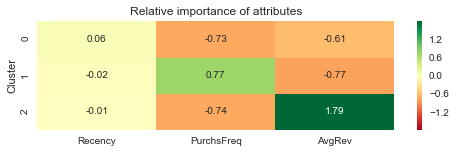

In [236]:
# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8, 2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

## Clusters with K = 4

In [242]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(df_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [243]:
# Create a DataFrame by adding a new cluster label column

df_rfm_k4 = df_final.assign(Cluster=cluster_labels)
df_rfm_k4.head()

,CustomerID,Recency,PurchsFreq,AvgRev,Cluster
0,12346.0,2902.0,1,77183.600000,2
1,12347.0,2579.0,182,23.681319,3
2,12348.0,2652.0,31,57.975484,1
3,12349.0,2595.0,73,24.076027,1
4,12350.0,2887.0,17,19.670588,0


In [246]:
df_rfm_k4.CustomerID = df_rfm_k4.CustomerID.astype(str)
df_rfm_k4.dtypes

CustomerID     object
Recency       float64
PurchsFreq      int64
AvgRev        float64
Cluster         int32
dtype: object

In [247]:
# Group the data by cluster
grouped = df_rfm_k4.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'PurchsFreq': 'mean',
    'AvgRev': ['mean', 'count']
  }).round(1)

Recency PurchsFreq AvgRev      
           mean       mean   mean count
Cluster                                
0        2831.3       26.2   18.6   904
1        2628.0       37.4   26.6  1625
2        2702.7       12.2  757.0   285
3        2610.3      203.4   13.7  1524

In [248]:
grouped.describe().round(1)

AvgRev                                                   PurchsFreq  \
          count   mean     std   min   25%    50%    75%      max      count   
Cluster                                                                        
0         904.0   18.6    11.2   2.1  12.6   16.9   22.0     95.4      904.0   
1        1625.0   26.6    20.2   3.1  16.5   20.1   28.8    240.6     1625.0   
2         285.0  757.0  5691.5  25.5  73.8  124.3  250.0  77183.6      285.0   
3        1524.0   13.7    11.0   2.2   6.2   11.9   18.4    175.0     1524.0   

                 ...                  Recency                                 \
          mean   ...      75%     max   count    mean    std     min     25%   
Cluster          ...                                                           
0         26.2   ...     31.0   297.0   904.0  2831.3   64.6  2697.0  2776.0   
1         37.4   ...     48.0   403.0  1625.0  2628.0   38.9  2577.0  2595.0   
2         12.2   ...      9.0   431.0   285.0  2702.7  102.0  2577.0  2620.0   
3        203.4   ...    219.0  7847.0  1524.0  2610.3   37.0  2577.0  2585.0   

                                 
            50%     75%     max  
Cluster                          
0        2829.0  2882.0  2950.0  
1        2620.0  2652.0  2740.0  
2        2676.0  2775.0  2950.0  
3        2598.0  2621.2  2775.0  

[4 rows x 24 columns]

In [250]:
# Exporting the Clusters/final output to excel file

df_rfm_k4.to_excel("Customer_Segments4_RFM.xlsx")

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

In [251]:
df_normalized.head()
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

In [252]:
pca_fs = pca.fit_transform(df_normalized)

In [253]:
type(pca_fs)

numpy.ndarray

In [254]:
# View of pca components
print(pca_fs[2])

[ 0.66785378  1.04363693]


In [266]:
# Apply PCA to reduce 32 dimensions into 2 components 
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)

# Applying PCA on our feature Matrix
# We get 2 columns as output Our PCA comps = 2. We assign each compt to x/y axis
df_rfm_k4['x'] = pca.fit_transform(x_cols)[:,0]
df_rfm_k4['y'] = pca.fit_transform(x_cols)[:,1]

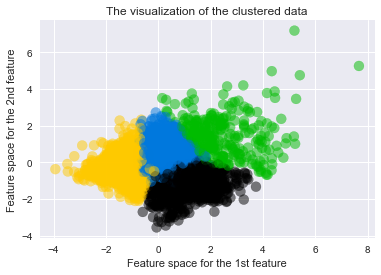

In [267]:
# Create a scatter plot of the two principal components 

# Defining color labels based on Clusters assigned

import matplotlib.cm as cm

colors = cm.spectral(df_rfm_k4.Cluster.astype(float) / 4)

# Using PC_1 / 2 Compt as axis
plt.scatter(df_rfm_k4.x, df_rfm_k4.y, marker='o', s=100, alpha=0.5, c=colors)

plt.title("The visualization of the clustered data")
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.show()